In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**duration:** length of signal 
<br>**meanfreq:** mean frequency (in kHz)
<br>**sd:**	standard deviation of frequency
<br>**median:**	median frequency (in kHz)
<br>**Q25:**	first quantile (in kHz)
<br>**Q75:**		third quantile (in kHz)
<br>**IQR:** interquantile range (in kHz)
<br>**skew:**	skewness (see note in specprop description)
<br>**kurt:**	kurtosis (see note in specprop description)
<br>**sp.ent:**	spectral entropy
<br>**sfm:** spectral flatness
<br>**mode:**	mode frequency
<br>**centroid:**	frequency centroid (see specprop)
<br>**peakf:**	peak frequency (frequency with highest energy)
<br>**meanfun:**	average of fundamental frequency measured across acoustic signal
<br>**minfun:**	minimum fundamental frequency measured across acoustic signal
<br>**maxfun:**	maximum fundamental frequency measured across acoustic signal
<br>**meandom:**	average of dominant frequency measured across acoustic signal
<br>**mindom:**	minimum of dominant frequency measured across acoustic signal
<br>**maxdom:**	maximum of dominant frequency measured across acoustic signal
<br>**dfrange:**	range of dominant frequency measured across acoustic signal
<br>**modindx:**	modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range

In [0]:
df = pd.read_csv('voice.csv')
data = np.array(df)

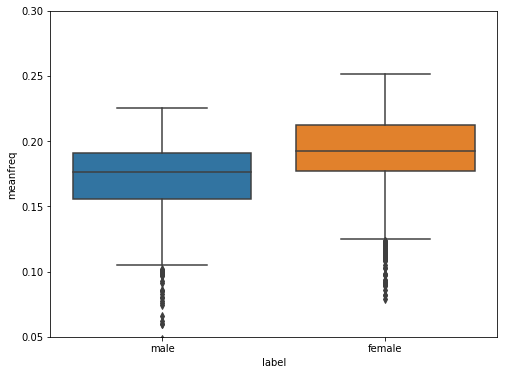

In [7]:
var = 'meanfreq'
#df_train["label"]=df_train["label"].astype('category')

data = pd.concat([df['label'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x="label", y=var, data=data)
fig.axis(ymin=0.05, ymax=0.30);

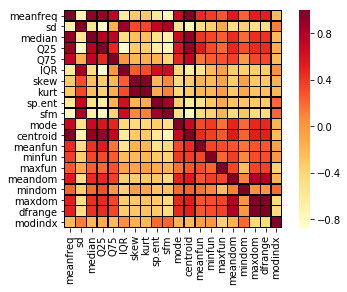

In [4]:
# Correlation matrix
corrmat = df.corr()
sns.heatmap(corrmat,linewidths=0.25,vmax=1.0, square=True, cmap="YlOrRd", linecolor='black'); 
plt.savefig('corr_matrix.png')

In [5]:
# Improving the model using feature_selection from sklearn

from sklearn.feature_selection import SelectKBest, f_classif

def select_kbest_clf(data_frame, target, k=20):
    """
    Selecting K-Best features for classification
    :param data_frame: A pandas dataFrame with the training data
    :param target: target variable name in DataFrame
    :param k: desired number of features from the data
    :returns feature_scores: scores for each feature in the data as 
    pandas DataFrame
    """
    feat_selector = SelectKBest(f_classif, k=k)
    _ = feat_selector.fit(data_frame.drop(target, axis=1), data_frame[target])
    
    feat_scores = pd.DataFrame()
    feat_scores["F Score"] = feat_selector.scores_
    feat_scores["P Value"] = feat_selector.pvalues_
    feat_scores["Support"] = feat_selector.get_support()
    feat_scores["Attribute"] = data_frame.drop(target, axis=1).columns
    
    return feat_scores
k=select_kbest_clf(df, 'label', k=0).sort_values(['F Score'],ascending=False)

k

,F Score,P Value,Support,Attribute
12,7228.790362,0.000000e+00,False,meanfun
5,1965.750000,0.000000e+00,False,IQR
3,1121.569224,9.140832e-211,False,Q25
8,1003.308717,1.614016e-191,False,sp.ent
1,945.461376,6.654756e-182,False,sd
9,463.923194,3.877715e-96,False,sfm
0,406.752820,3.368951e-85,False,meanfreq
11,406.752820,3.368951e-85,False,centroid
2,277.588158,8.259210e-60,False,median
17,126.024161,1.050986e-28,False,maxdom


Text(0.5, 1.0, 'Feature Importance')

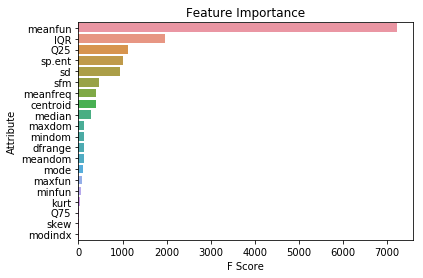

In [6]:
# Feature importance figure
k1=sns.barplot(x=k['F Score'],y=k['Attribute'])
k1.set_title('Feature Importance')

In [10]:
#Correlation with output variable
cor_target = abs(corrmat["meanfreq"])
#Selecting highly correlated features
irrelevant_features = cor_target[cor_target>0.9]
irrelevant_features


meanfreq    1.000000
median      0.925445
Q25         0.911416
centroid    1.000000
Name: meanfreq, dtype: float64

In [11]:
#Correlation with output variable
cor_target = abs(corrmat["sd"])
#Selecting highly correlated features
irrelevant_features = cor_target[cor_target>0.8]
irrelevant_features

sd     1.000000
Q25    0.846931
IQR    0.874660
sfm    0.838086
Name: sd, dtype: float64

In [12]:
#df=df.drop('q25',1)
#df=df.drop('median',1)
#df=df.drop('centroid',1)
#df=df.drop('q75',1)
#df=df.drop('modindx',1)
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [13]:
df.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [14]:
#Dropping outliers
#df = df.drop(df[(df['meandom']>2) & (df['median']<0.1)].index)
xf = df.iloc[:,:-1]
xf

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,0.112555,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,0.086197,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,0.128324,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,0.219103,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,0.011699,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920


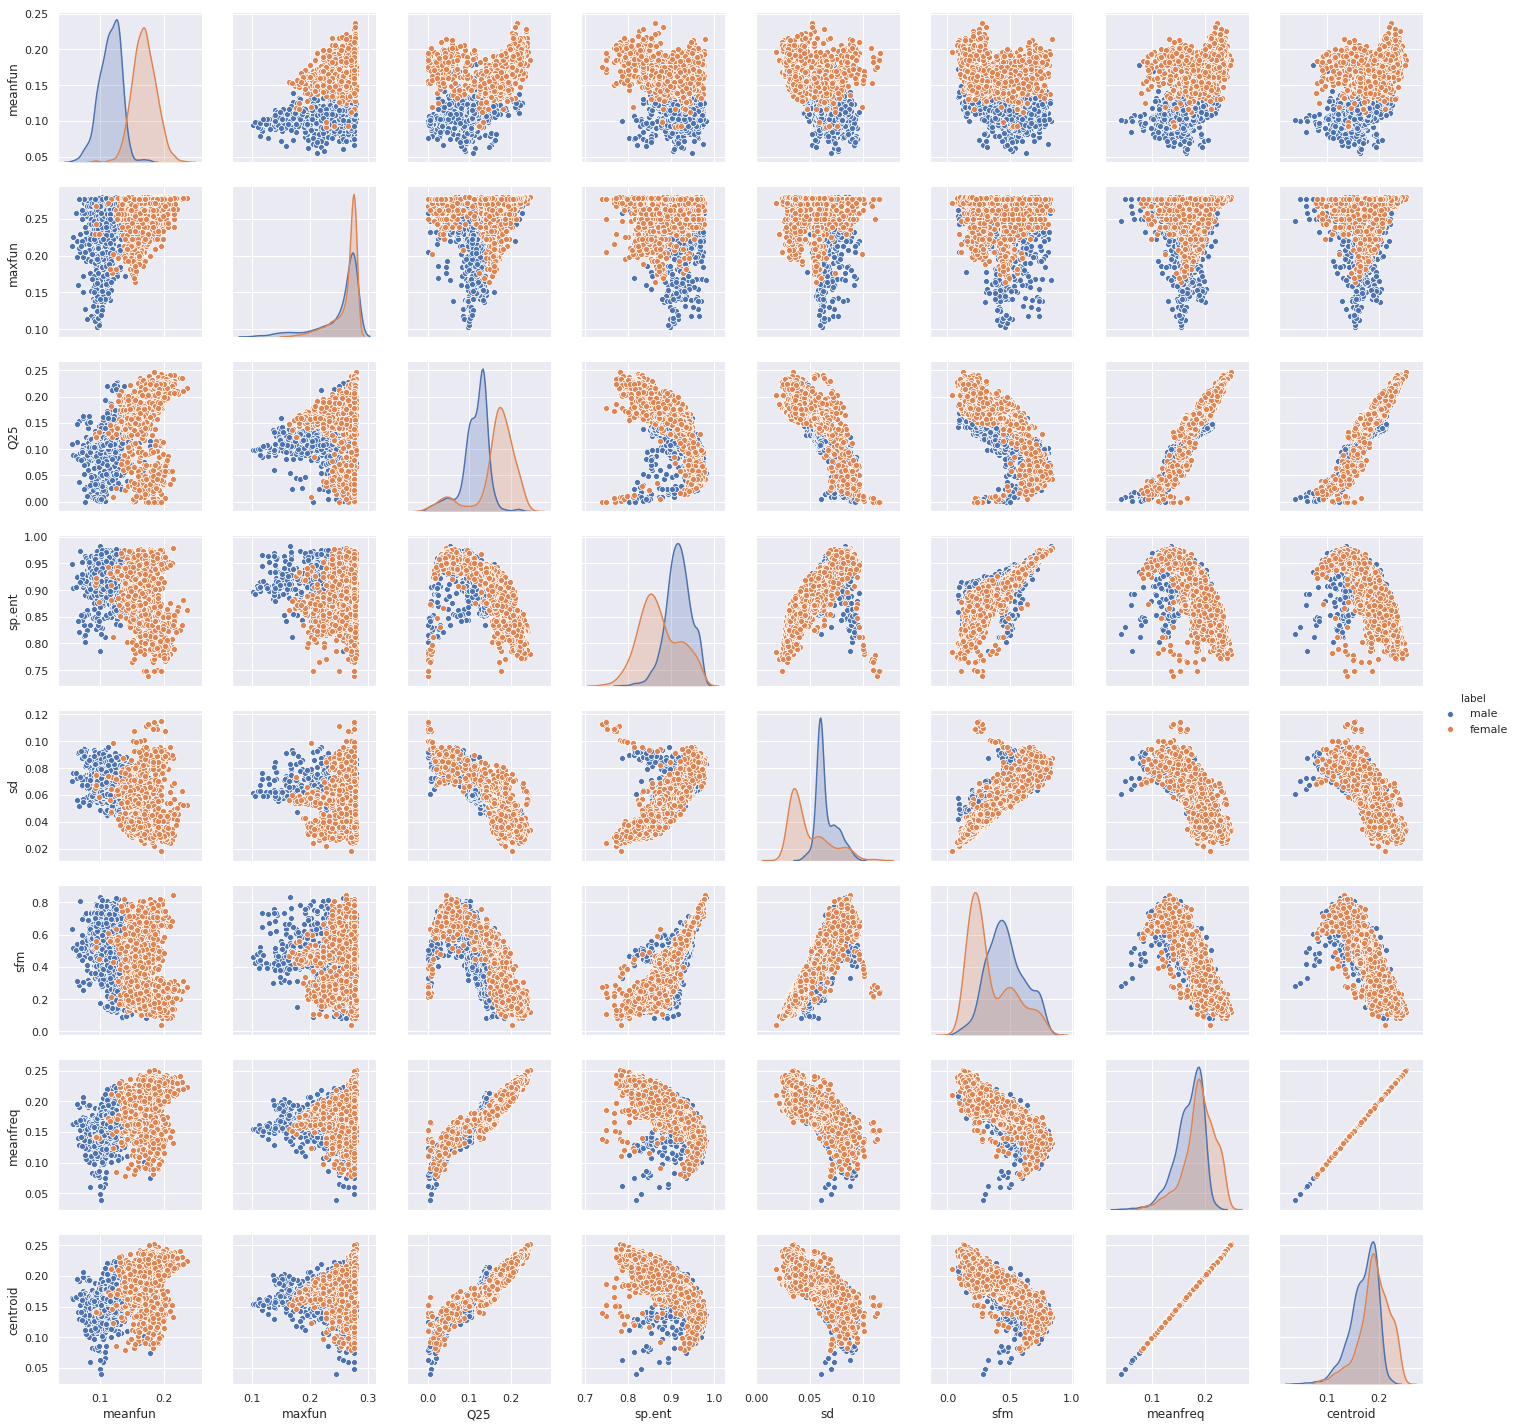

<Figure size 432x288 with 0 Axes>

In [17]:
# Scatterplot of different parameters
sns.set()
cols = ['meanfun', 'maxfun', 'Q25',  'sp.ent', 'sd',
       'sfm',   'meanfreq', 'centroid', 'label']
sns.pairplot(df[cols], size = 2.5, hue='label')
plt.show();
plt.savefig('scatter_plot.png')

In [19]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xf=scaler.fit_transform(xf)
xf

array([[-4.04924806,  0.4273553 , -4.22490077, ..., -1.43142165,
        -1.41913712, -1.45477229],
       [-3.84105325,  0.6116695 , -3.99929342, ..., -1.41810716,
        -1.4058184 , -1.01410294],
       [-3.46306647,  1.60384791, -4.09585052, ..., -1.42920257,
        -1.41691733, -1.06534356],
       ...,
       [-1.29877326,  2.32272355, -0.05197279, ..., -0.5992661 ,
        -0.58671739,  0.17588664],
       [-1.2452018 ,  2.012196  , -0.01772849, ..., -0.41286326,
        -0.40025537,  1.14916112],
       [-0.51474626,  2.14765111, -0.07087873, ..., -1.27608595,
        -1.2637521 ,  1.47567886]])

In [0]:
#Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=11)
yf=pca.fit_transform(xf)

In [21]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.45216391, 0.11870609, 0.10909939, 0.07619763, 0.05293938,
       0.04614966, 0.03204482, 0.02898394, 0.02451726, 0.01875518,
       0.01655906])

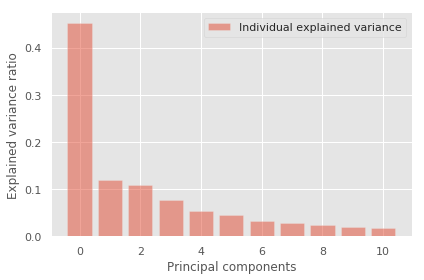

In [22]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(11), explained_variance[:11], alpha=0.5, align='center',
           label='Individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

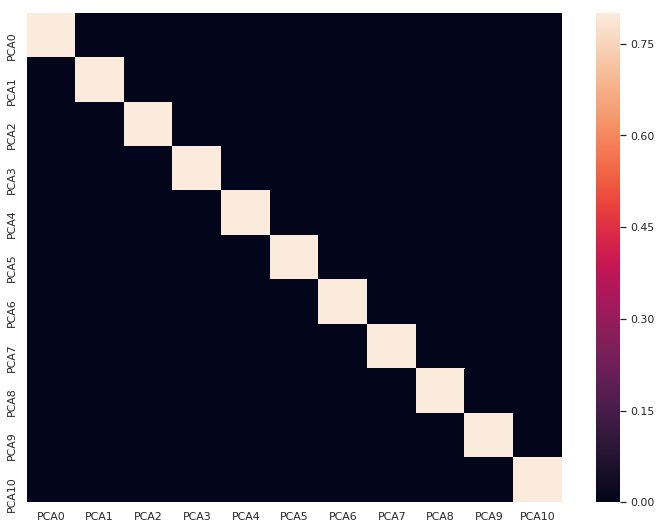

In [23]:
#Plot PCA Correlation Matrix
outputpca = pd.DataFrame(pca.transform(xf), columns=['PCA%i' % i for i in range(11)], index=df.index)
cor2 = outputpca.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(cor2, vmax=.8, square=False);

In [24]:
y = df['label']
y=y.astype(str)
for i in range(len(y)):
  if y[i]=='male':
    y[i]=1
  else: 
    y[i]=0
y=y.astype(int)
y

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
3138    0
3139    0
3140    0
3141    0
3142    0
3143    0
3144    0
3145    0
3146    0
3147    0
3148    0
3149    0
3150    0
3151    0
3152    0
3153    0
3154    0
3155    0
3156    0
3157    0
3158    0
3159    0
3160    0
3161    0
3162    0
3163    0
3164    0
3165    0
3166    0
3167    0
Name: label, Length: 3168, dtype: int64

In [0]:
def classify(model,x_train,y_train,x_test,y_test):
    from sklearn.metrics import classification_report
    target_names = ['female', 'male']
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(classification_report(y_test, y_pred, target_names=target_names, digits=4))

In [0]:
import keras
import sklearn 
#Doing LDA with the database
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

x = df.drop(['label'],axis=1)
#Use this if you want to use the PCA matrix as the param matrix:
x_all = outputpca
#Use this if you want to use the normal param matrix:
#x_all = x
y_all = y
#y_all = keras.utils.np_utils.to_categorical(y)


#Finding the best split size

def best_test_size(x_all,y_all,clf):
  error_rate=[]
  test_size=[]
  for i in range(15):
    x_train, x_test, y_train, y_real = sklearn.model_selection.train_test_split(x_all, y_all, test_size = 0.05*(i+1), random_state=0)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    error_rate.append(np.mean(y_pred != y_real))
    test_size.append(0.05*(i+1))
  kloc = error_rate.index(min(error_rate))
  print("Lowest error is %s occurs at C=%s." % 
        (error_rate[kloc], test_size[kloc]))

  plt.plot(test_size, error_rate, color='blue', linestyle='dashed', marker='o',
           markerfacecolor='black', markersize=10)
  plt.title('Error Rate vs. Test Size')
  plt.xlabel('Size')
  plt.ylabel('Error Rate')
  plt.show()
  return test_size[kloc]

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
print("Score for Number of Neighbors = 3: {}".format(knn.score(x_test,y_test)))
method_names.append("KNN")
method_scores.append(knn.score(x_test,y_test))

NameError: ignored

Lowest error is 0.02996845425867508 occurs at C=0.2.


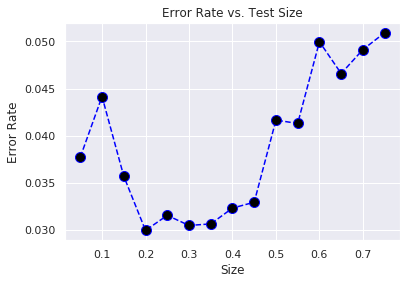

              precision    recall  f1-score   support

      female     0.9764    0.9601    0.9682       301
        male     0.9645    0.9790    0.9717       333

    accuracy                         0.9700       634
   macro avg     0.9704    0.9696    0.9699       634
weighted avg     0.9701    0.9700    0.9700       634



In [37]:
#LDA

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=10)
x_train, x_test, y_train, y_real = sklearn.model_selection.train_test_split(x_all, y_all, test_size=best_test_size(x_all,y_all,clf), random_state=0)
clf.fit(x_train,y_train)



classify(clf,x_train,y_train,x_test,y_real)

Lowest error is 0.02365930599369085 occurs at C=0.4.


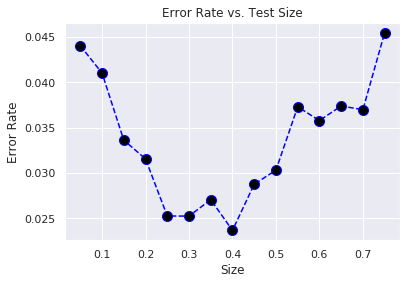

              precision    recall  f1-score   support

      female     0.9784    0.9719    0.9752       606
        male     0.9745    0.9804    0.9774       662

    accuracy                         0.9763      1268
   macro avg     0.9764    0.9762    0.9763      1268
weighted avg     0.9764    0.9763    0.9763      1268



In [38]:
#XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier()
x_train, x_test, y_train, y_real = sklearn.model_selection.train_test_split(x_all, y_all, test_size=best_test_size(x_all,y_all,xgb), random_state=0)
classify(xgb,x_train,y_train,x_test,y_real)

In [0]:
from sklearn import neural_network
def nn_error(n,x_train,y_train,x_test,y_test):
    error_rate = []
    hidden_layer=range(1,n)
    for i in hidden_layer:
        model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=i,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at C=%s." % (error_rate[kloc], 
                                                  hidden_layer[kloc]))

    plt.plot(hidden_layer, error_rate, color='blue', 
             linestyle='dashed', marker='o',
             markerfacecolor='black', markersize=10)
    plt.title('Error Rate vs. Hidden Layer Size')
    plt.xlabel('Size')
    plt.ylabel('Error Rate')
    plt.show()
    return hidden_layer[kloc]

In [0]:
#Neural Network
import keras
import sklearn 

x = df.drop(['label'],axis=1)
#Use this if you want to use the PCA matrix as the param matrix:
x_all = outputpca
#Use this if you want to use the normal param matrix:
#x_all = x
y_all = y
#y_all = keras.utils.np_utils.to_categorical(y)
x_train, x_test, y_train, y_real = sklearn.model_selection.train_test_split(x_all, y_all, test_size=0.3, random_state=0)
h = nn_error(200,x_train,y_train,x_test,y_real)
model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=h,
                                       activation='logistic',random_state=17,
                                       max_iter=5000)
classify(model,x_train,y_train,x_test,y_real)